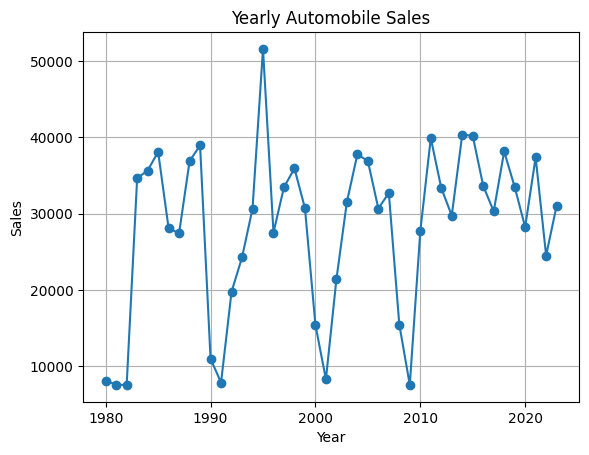

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv")

# TASK 1.1: Line chart - Total sales per year
df.groupby('Year')['Automobile_Sales'].sum().plot(kind='line', marker='o')
plt.title('Yearly Automobile Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

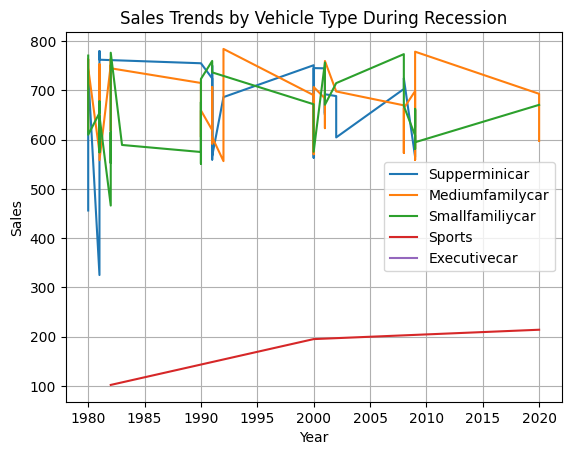

In [2]:
# TASK 1.2: Line chart by vehicle type during recession
df_recession = df[df['Recession'] == 1]
for vehicle in df_recession['Vehicle_Type'].unique():
    subset = df_recession[df_recession['Vehicle_Type'] == vehicle]
    plt.plot(subset['Year'], subset['Automobile_Sales'], label=vehicle)
plt.title('Sales Trends by Vehicle Type During Recession')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-3-4f98fd17ac76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recession['Period'] = 'Recession'


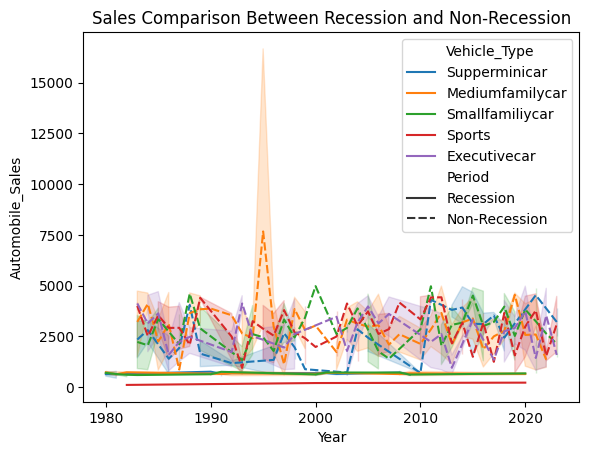

In [3]:
# TASK 1.3: Seaborn lineplot comparing recession and non-recession
df_recession['Period'] = 'Recession'
df_nonrecession = df[df['Recession'] == 0].copy()
df_nonrecession['Period'] = 'Non-Recession'
df_combined = pd.concat([df_recession, df_nonrecession])
sns.lineplot(data=df_combined, x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='Period')
plt.title("Sales Comparison Between Recession and Non-Recession")
plt.show()

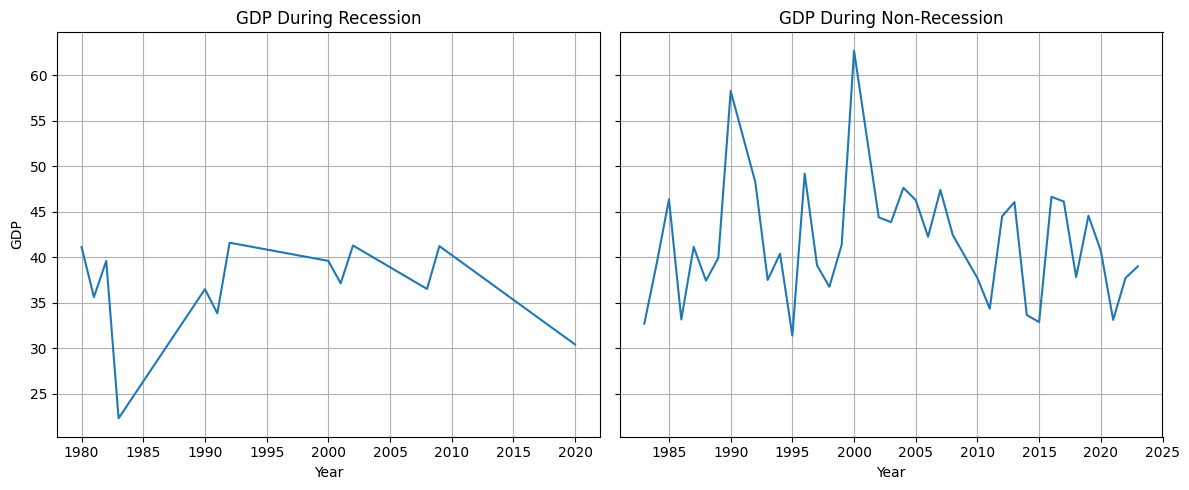

In [4]:
# TASK 1.4: Subplot for GDP variation
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
df[df['Recession'] == 1].groupby('Year')['GDP'].mean().plot(ax=axes[0], title="GDP During Recession")
df[df['Recession'] == 0].groupby('Year')['GDP'].mean().plot(ax=axes[1], title="GDP During Non-Recession")
for ax in axes:
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP')
    ax.grid(True)
plt.tight_layout()
plt.show()

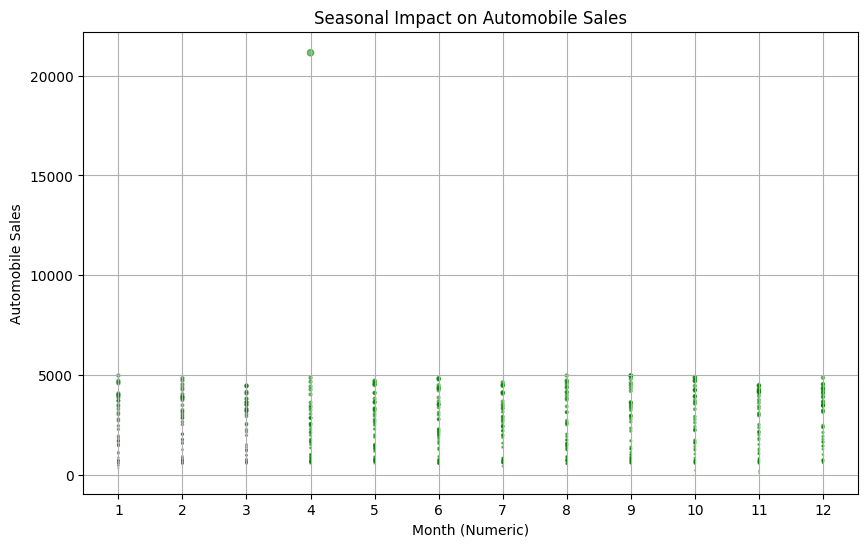

In [5]:
# Convert month name abbreviations to month numbers
df['Month_Num'] = pd.to_datetime(df['Month'], format='%b').dt.month

# Bubble plot: size of point = sales volume
plt.figure(figsize=(10, 6))
plt.scatter(df['Month_Num'], df['Automobile_Sales'],
            s=df['Automobile_Sales']/1000, alpha=0.5, c='green')

plt.xlabel('Month (Numeric)')
plt.ylabel('Automobile Sales')
plt.title('Seasonal Impact on Automobile Sales')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()


In [6]:
print(df_recession.columns)


Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City', 'Period'],
      dtype='object')


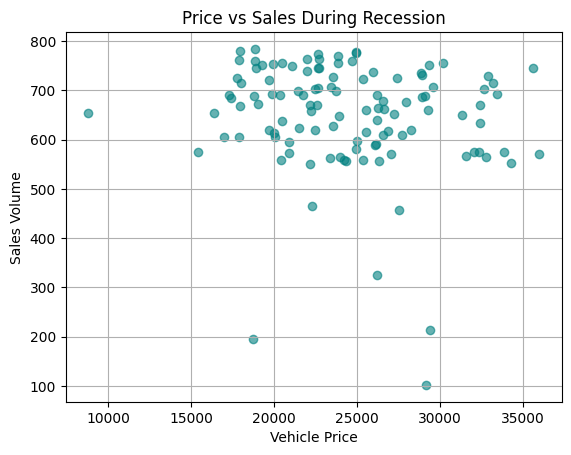

In [7]:
# TASK 1.6: Scatter plot - price vs sales during recession
plt.scatter(df_recession['Price'], df_recession['Automobile_Sales'], alpha=0.6, color='teal')
plt.title("Price vs Sales During Recession")
plt.xlabel("Vehicle Price")
plt.ylabel("Sales Volume")
plt.grid(True)
plt.show()


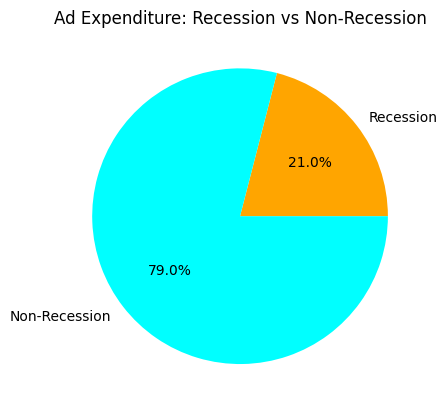

In [8]:

# TASK 1.7: Pie chart - Ad expenditure in recession vs non-recession
ad_recession = df[df['Recession'] == 1]['Advertising_Expenditure'].sum()
ad_nonrecession = df[df['Recession'] == 0]['Advertising_Expenditure'].sum()
plt.pie([ad_recession, ad_nonrecession], labels=['Recession', 'Non-Recession'], autopct='%1.1f%%', colors=['orange', 'cyan'])
plt.title("Ad Expenditure: Recession vs Non-Recession")
plt.show()

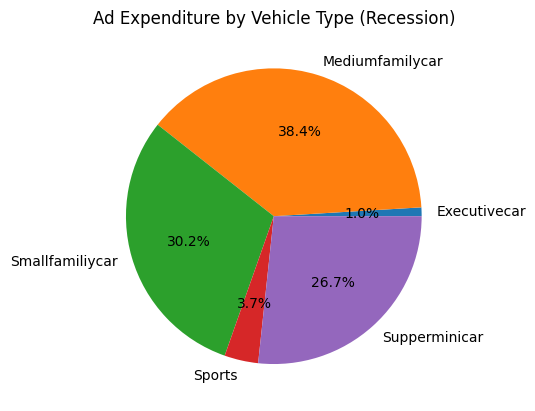

In [9]:
# TASK 1.8: Pie chart - Ad expenditure by vehicle type during recession
ad_by_type = df[df['Recession'] == 1].groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
plt.pie(ad_by_type, labels=ad_by_type.index, autopct='%1.1f%%')
plt.title("Ad Expenditure by Vehicle Type (Recession)")
plt.show()

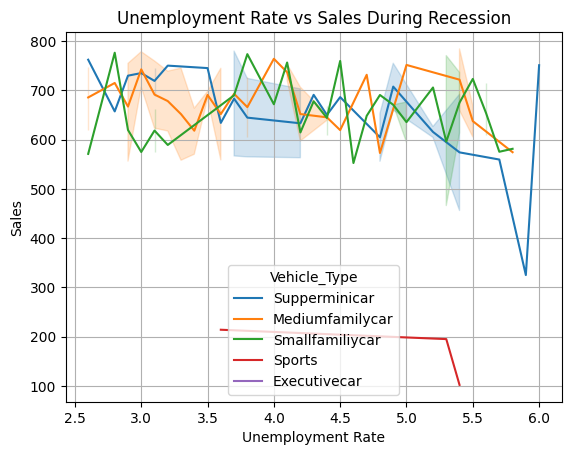

In [10]:
sns.lineplot(data=df[df['Recession'] == 1], x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type')
plt.title("Unemployment Rate vs Sales During Recession")
plt.xlabel("Unemployment Rate")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


In [11]:
!pip install dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [17]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Load your dataset (replace with actual path if needed)
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv")

# Initialize the Dash app
app = dash.Dash(__name__)
app.title = "Automobile Sales Dashboard"

# TASK 2.1: Title
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard", style={'textAlign': 'center'}),

    # TASK 2.2: Dropdowns
    html.Div([
        html.Label("Select Report Type:"),
        dcc.Dropdown(
            id='report-type',
            options=[
                {'label': 'Recession Report', 'value': 'recession'},
                {'label': 'Yearly Report', 'value': 'yearly'}
            ],
            value='recession',
            placeholder='Choose a report'
        ),
        html.Br(),

        html.Label("Select Vehicle Type:"),
        dcc.Dropdown(
            id='vehicle-type',
            options=[{'label': vt, 'value': vt} for vt in df['Vehicle_Type'].unique()],
            value=df['Vehicle_Type'].unique()[0]
        )
    ], style={'width': '48%', 'display': 'inline-block', 'padding': '20px'}),

    # TASK 2.3: Output Display
    html.Div(id='output-container', className='output-display', style={'marginTop': '30px'}),

    # Graphs will be inserted here
    dcc.Graph(id='main-graph')
])

# TASK 2.4: Callback to update the input container and graph
@app.callback(
    Output('output-container', 'children'),
    Output('main-graph', 'figure'),
    Input('report-type', 'value'),
    Input('vehicle-type', 'value')
)
def update_dashboard(report_type, vehicle_type):
    if report_type == 'recession':
        df_filtered = df[df['Recession'] == 1]
        title = f"Recession Sales Trend for {vehicle_type}"
        fig = px.line(
            df_filtered[df_filtered['Vehicle_Type'] == vehicle_type],
            x='Year',
            y='Automobile_Sales',
            title=title
        )
        return f"Displaying Recession Report for {vehicle_type}", fig

    elif report_type == 'yearly':
        df_yearly = df[df['Vehicle_Type'] == vehicle_type]
        title = f"Yearly Sales Trend for {vehicle_type}"
        fig = px.bar(
            df_yearly,
            x='Year',
            y='Automobile_Sales',
            color='City',
            barmode='group',
            title=title
        )
        return f"Displaying Yearly Report for {vehicle_type}", fig

# Run the app
if __name__ == '__main__':
    app.run(debug=False)



<IPython.core.display.Javascript object>